In [33]:
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os

import phate
import scanpy as sc


In [5]:
# Meta data
DATA_DIR = "../../data/multi_cite/"
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")
FP_TRAIN_CITE_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
# F_TRAIN_MULTI_INPUT = 

df_meta = pd.read_csv(FP_CELL_METADATA)
df_meta

cell_id  day  donor cell_type technology
0       c2150f55becb    2  27678       HSC    citeseq
1       65b7edf8a4da    2  27678       HSC    citeseq
2       c1b26cb1057b    2  27678      EryP    citeseq
3       917168fa6f83    2  27678      NeuP    citeseq
4       2b29feeca86d    2  27678      EryP    citeseq
...              ...  ...    ...       ...        ...
281523  96a60b026659   10  31800    hidden   multiome
281524  d493e546991e   10  31800    hidden   multiome
281525  05666c99aa48   10  31800    hidden   multiome
281526  121f946642b5   10  31800    hidden   multiome
281527  b847ba21f59f   10  31800    hidden   multiome

[281528 rows x 5 columns]

In [6]:
df_train = pd.read_hdf(FP_TRAIN_CITE_INPUTS)
df_train

gene_id       ENSG00000121410_A1BG  ENSG00000268895_A1BG-AS1   
cell_id                                                        
45006fe3e4c8                   0.0                       0.0  \
d02759a80ba2                   0.0                       0.0   
c016c6b0efa5                   0.0                       0.0   
ba7f733a4f75                   0.0                       0.0   
fbcf2443ffb2                   0.0                       0.0   
...                            ...                       ...   
650ee456f0f3                   0.0                       0.0   
cc506e7707f5                   0.0                       0.0   
a91f1b55a520                   0.0                       0.0   
3a9882c98205                   0.0                       0.0   
c91b6b2ccd3d                   0.0                       0.0   

gene_id       ENSG00000175899_A2M  ENSG00000245105_A2M-AS1   
cell_id                                                      
45006fe3e4c8                  0.0                      0.0  \
d02759a80ba2                  0.0                      0.0   
c016c6b0efa5                  0.0                      0.0   
ba7f733a4f75                  0.0                      0.0   
fbcf2443ffb2                  0.0                      0.0   
...                           ...                      ...   
650ee456f0f3                  0.0                      0.0   
cc506e7707f5                  0.0                      0.0   
a91f1b55a520                  0.0                      0.0   
3a9882c98205                  0.0                      0.0   
c91b6b2ccd3d                  0.0                      0.0   

gene_id       ENSG00000166535_A2ML1  ENSG00000128274_A4GALT   
cell_id                                                       
45006fe3e4c8                    0.0                0.000000  \
d02759a80ba2                    0.0                0.000000   
c016c6b0efa5                    0.0                3.847321   
ba7f733a4f75                    0.0                0.000000   
fbcf2443ffb2                    0.0                0.000000   
...                             ...                     ...   
650ee456f0f3                    0.0                0.000000   
cc506e7707f5                    0.0                0.000000   
a91f1b55a520                    0.0                0.000000   
3a9882c98205                    0.0                0.000000   
c91b6b2ccd3d                    0.0                0.000000   

gene_id       ENSG00000094914_AAAS  ENSG00000081760_AACS   
cell_id                                                    
45006fe3e4c8              0.000000              0.000000  \
d02759a80ba2              0.000000              0.000000   
c016c6b0efa5              0.000000              3.847321   
ba7f733a4f75              3.436846              3.436846   
fbcf2443ffb2              0.000000              4.196826   
...                            ...                   ...   
650ee456f0f3              0.000000              0.000000   
cc506e7707f5              3.981467              4.665241   
a91f1b55a520              0.000000              4.497696   
3a9882c98205              3.900907              0.000000   
c91b6b2ccd3d              0.000000              0.000000   

gene_id       ENSG00000109576_AADAT  ENSG00000103591_AAGAB  ...   
cell_id                                                     ...   
45006fe3e4c8               0.000000               0.000000  ...  \
d02759a80ba2               0.000000               0.000000  ...   
c016c6b0efa5               3.847321               0.000000  ...   
ba7f733a4f75               0.000000               0.000000  ...   
fbcf2443ffb2               0.000000               0.000000  ...   
...                             ...                    ...  ...   
650ee456f0f3               0.000000               0.000000  ...   
cc506e7707f5               0.000000               0.000000  ...   
a91f1b55a520               0.000000               4.497696  ...   
3a9882c98205          

In [42]:
# Only focus on donor 13176
donor = 13176
df_donor_meta = df_meta[df_meta['donor']==donor]
print(df_donor_meta.shape)


(73211, 5)


In [11]:
df_cell_cite = df_donor_meta[df_donor_meta.technology=="citeseq"]
df_cell_multi = df_donor_meta[df_donor_meta.technology=="multiome"]
print(df_cell_cite.shape)
print(df_cell_multi.shape)

(29394, 5)
(43817, 5)


In [14]:
df_cell_cite.head()

cell_id  day  donor cell_type technology
59283  08a6f9047e1f    2  13176      NeuP    citeseq
59284  dc33db8b968f    2  13176      EryP    citeseq
59285  bb17cbbb7869    2  13176       HSC    citeseq
59286  608afab25c95    2  13176       HSC    citeseq
59287  f0a5edc0a949    2  13176      NeuP    citeseq

In [18]:
donor_cell_ids = df_cell_cite['cell_id'].tolist()
print(len(donor_cell_ids))

29394


['45006fe3e4c8',
 'd02759a80ba2',
 'c016c6b0efa5',
 'ba7f733a4f75',
 'fbcf2443ffb2',
 'd80d84ca8e89',
 '1ac2049b4c98',
 '33fb0c29e2e4',
 'b329261bd0ee',
 '703762287e88',
 'b646f9b319d5',
 '8dbe30c95702',
 '14872957f6f5',
 '2d64cde52cb5',
 'f12e269586de',
 '9b761504056d',
 '086f8e248454',
 '1d2726dd7b00',
 '2f4ee4660cd0',
 '6e3e3bea962c',
 '7b73a396081b',
 '4f2843b68f54',
 'ce59e8ae43b2',
 'f177e24dd27f',
 '3e9868bca666',
 'f64f24ba925a',
 'daa10d474d5f',
 '14eb0b93a25a',
 '9091907ae959',
 '83ad957ed9a8',
 'd87f439a9f22',
 'ea1975bd6055',
 '95759da25a74',
 '4936ac8d22ba',
 'f194d259da45',
 'b0f55f2b7a9a',
 '691d7b9f980d',
 '9085ea05115e',
 'bd0c425de3e4',
 '95ce3f4e74d8',
 'f2479eb2c99f',
 '87229342150a',
 'bec79ad8d168',
 '3e8d5a22299d',
 'fa035a84c643',
 'e3c2ca1485a8',
 '1110c446285e',
 'a91d20f23794',
 '755f28c0c23b',
 '92a8207d0e3e',
 '347f40965136',
 'c0d1376c85de',
 'f059c0fa7f2f',
 'b0745a4706d5',
 '871058f78714',
 '6f115b350948',
 'a6821a25dca4',
 '8663f1200ec5',
 '824a1a093b1e

In [44]:
# Get cell ids form train data
df_train_cell_ids = df_train.index.tolist()
print(len(df_train_cell_ids))
print(len(np.intersect1d(donor_cell_ids, df_train_cell_ids)))

70988
22199


In [45]:
df_donor_meta_in_train = df_donor_meta[df_donor_meta.cell_id.isin(df_train_cell_ids)]
print(df_donor_meta_in_train.shape)

(22199, 5)


In [46]:
df_donor_meta_in_train

cell_id  day  donor cell_type technology
59283  08a6f9047e1f    2  13176      NeuP    citeseq
59284  dc33db8b968f    2  13176      EryP    citeseq
59285  bb17cbbb7869    2  13176       HSC    citeseq
59286  608afab25c95    2  13176       HSC    citeseq
59287  f0a5edc0a949    2  13176      NeuP    citeseq
...             ...  ...    ...       ...        ...
81477  ef7e79edcc50    4  13176       HSC    citeseq
81478  15a8e64203ff    4  13176       HSC    citeseq
81479  91d021af3575    4  13176       HSC    citeseq
81480  74ddd9b98b60    4  13176       HSC    citeseq
81481  9f714184f4d6    4  13176      NeuP    citeseq

[22199 rows x 5 columns]

In [29]:
# Filter train data based on the cell barcode
df_train_donor = df_train[df_train.index.isin(donor_cell_ids)]
df_train_donor

gene_id       ENSG00000121410_A1BG  ENSG00000268895_A1BG-AS1   
cell_id                                                        
08a6f9047e1f                   0.0                       0.0  \
dc33db8b968f                   0.0                       0.0   
bb17cbbb7869                   0.0                       0.0   
608afab25c95                   0.0                       0.0   
f0a5edc0a949                   0.0                       0.0   
...                            ...                       ...   
ef7e79edcc50                   0.0                       0.0   
15a8e64203ff                   0.0                       0.0   
91d021af3575                   0.0                       0.0   
74ddd9b98b60                   0.0                       0.0   
9f714184f4d6                   0.0                       0.0   

gene_id       ENSG00000175899_A2M  ENSG00000245105_A2M-AS1   
cell_id                                                      
08a6f9047e1f                  0.0                      0.0  \
dc33db8b968f                  0.0                      0.0   
bb17cbbb7869                  0.0                      0.0   
608afab25c95                  0.0                      0.0   
f0a5edc0a949                  0.0                      0.0   
...                           ...                      ...   
ef7e79edcc50                  0.0                      0.0   
15a8e64203ff                  0.0                      0.0   
91d021af3575                  0.0                      0.0   
74ddd9b98b60                  0.0                      0.0   
9f714184f4d6                  0.0                      0.0   

gene_id       ENSG00000166535_A2ML1  ENSG00000128274_A4GALT   
cell_id                                                       
08a6f9047e1f                    0.0                     0.0  \
dc33db8b968f                    0.0                     0.0   
bb17cbbb7869                    0.0                     0.0   
608afab25c95                    0.0                     0.0   
f0a5edc0a949                    0.0                     0.0   
...                             ...                     ...   
ef7e79edcc50                    0.0                     0.0   
15a8e64203ff                    0.0                     0.0   
91d021af3575                    0.0                     0.0   
74ddd9b98b60                    0.0                     0.0   
9f714184f4d6                    0.0                     0.0   

gene_id       ENSG00000094914_AAAS  ENSG00000081760_AACS   
cell_id                                                    
08a6f9047e1f              3.451580              0.000000  \
dc33db8b968f              4.264111              0.000000   
bb17cbbb7869              0.000000              0.000000   
608afab25c95              0.000000              4.199862   
f0a5edc0a949              0.000000              0.000000   
...                            ...                   ...   
ef7e79edcc50              0.000000              0.000000   
15a8e64203ff              0.000000              4.539684   
91d021af3575              4.490172              4.490172   
74ddd9b98b60              0.000000              0.000000   
9f714184f4d6              0.000000              4.955260   

gene_id       ENSG00000109576_AADAT  ENSG00000103591_AAGAB  ...   
cell_id                                                     ...   
08a6f9047e1f               0.000000                    0.0  ...  \
dc33db8b968f               0.000000                    0.0  ...   
bb17cbbb7869               3.884389                    0.0  ...   
608afab25c95               0.000000                    0.0  ...   
f0a5edc0a949               0.000000                    0.0  ...   
...                             ...                    ...  ...   
ef7e79edcc50               0.000000                    0.0  ...   
15a8e64203ff               0.000000                    0.0  ...   
91d021af3575               0.000000                    0.0  ...   
74ddd9b98b60          

In [40]:
sample_class =df_donor_meta[df_donor_meta['cell_type'] != "unknown"]['day'].unique()
print(sample_class)
print(len(df_donor_meta[df_donor_meta['cell_type'] != "unknown"]['day'].tolist()))
print(len(df_donor_meta['day'].tolist()))

[ 2  3  4  7 10]
73211
73211


In [38]:
df_train_donor.head()

gene_id       ENSG00000121410_A1BG  ENSG00000268895_A1BG-AS1   
cell_id                                                        
08a6f9047e1f                   0.0                       0.0  \
dc33db8b968f                   0.0                       0.0   
bb17cbbb7869                   0.0                       0.0   
608afab25c95                   0.0                       0.0   
f0a5edc0a949                   0.0                       0.0   

gene_id       ENSG00000175899_A2M  ENSG00000245105_A2M-AS1   
cell_id                                                      
08a6f9047e1f                  0.0                      0.0  \
dc33db8b968f                  0.0                      0.0   
bb17cbbb7869                  0.0                      0.0   
608afab25c95                  0.0                      0.0   
f0a5edc0a949                  0.0                      0.0   

gene_id       ENSG00000166535_A2ML1  ENSG00000128274_A4GALT   
cell_id                                                       
08a6f9047e1f                    0.0                     0.0  \
dc33db8b968f                    0.0                     0.0   
bb17cbbb7869                    0.0                     0.0   
608afab25c95                    0.0                     0.0   
f0a5edc0a949                    0.0                     0.0   

gene_id       ENSG00000094914_AAAS  ENSG00000081760_AACS   
cell_id                                                    
08a6f9047e1f              3.451580              0.000000  \
dc33db8b968f              4.264111              0.000000   
bb17cbbb7869              0.000000              0.000000   
608afab25c95              0.000000              4.199862   
f0a5edc0a949              0.000000              0.000000   

gene_id       ENSG00000109576_AADAT  ENSG00000103591_AAGAB  ...   
cell_id                                                     ...   
08a6f9047e1f               0.000000                    0.0  ...  \
dc33db8b968f               0.000000                    0.0  ...   
bb17cbbb7869               3.884389                    0.0  ...   
608afab25c95               0.000000                    0.0  ...   
f0a5edc0a949               0.000000                    0.0  ...   

gene_id       ENSG00000153975_ZUP1  ENSG00000086827_ZW10   
cell_id                                                    
08a6f9047e1f              0.000000              4.528836  \
dc33db8b968f              0.000000              3.584930   
bb17cbbb7869              3.884389              0.000000   
608afab25c95              0.000000              0.000000   
f0a5edc0a949              0.000000              0.000000   

gene_id       ENSG00000174442_ZWILCH  ENSG00000122952_ZWINT   
cell_id                                                       
08a6f9047e1f                3.451580               5.035335  \
dc33db8b968f                4.264111               3.584930   
bb17cbbb7869                0.000000               4.567203   
608afab25c95                0.000000               5.288425   
f0a5edc0a949                0.000000               4.234367   

gene_id       ENSG00000198205_ZXDA  ENSG00000198455_ZXDB   
cell_id                                                    
08a6f9047e1f                   0.0                   0.0  \
dc33db8b968f                   0.0                   0.0   
bb17cbbb7869                   0.0                   0.0   
608afab25c95                   0.0                   0.0   
f0a5edc0a949                   0.0                   0.0   

gene_id       ENSG00000070476_ZXDC  ENSG00000162378_ZYG11B   
cell_id                                                      
08a6f9047e1f              4.128753                0.000000  \
dc33db8b968f              0.000000                3.584930   
bb17cbbb7869              3.884389                0.000000   
608afab25c95              0.000000                0.000000   
f0a5edc0a949              0.000000                3.555605   

gene_id       ENSG00000159840_ZYX  ENSG00000074755_ZZEF1  
cell_

### Visualize the df_train_donor

In [48]:
adata = ad.AnnData(df_train_donor)
adata.var_names = df_train_donor.columns
adata.obs_names = df_train_donor.index
adata.obs['donor'] = donor
adata.obs['technology'] = 'citeseq'
adata.obs['cell_id'] = df_train_donor.index
adata.var['feature_name'] = df_train_donor.columns
adata

AnnData object with n_obs × n_vars = 22199 × 22050
    obs: 'donor', 'technology', 'cell_id'
    var: 'feature_name'

In [49]:
# pair day with cell id
cellid2day = {cell_id: day for cell_id, day in zip(df_donor_meta_in_train['cell_id'], df_donor_meta_in_train['day'])}
adata.obs['day'] = [cellid2day[cell_id] for cell_id in adata.obs['cell_id']]

adata

AnnData object with n_obs × n_vars = 22199 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day'
    var: 'feature_name'

In [52]:
day_class = np.unique(adata.obs['day'].tolist())
print(day_class)
day2class = {day: i for i, day in enumerate(day_class)}
adata.obs['day_class'] = [day2class[day] for day in adata.obs['day']]

print(adata)

[2 3 4]
AnnData object with n_obs × n_vars = 22199 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'feature_name'


In [57]:
adata

AnnData object with n_obs × n_vars = 22199 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'feature_name'

In [58]:
# save adata
adata.write("adata_cite_train_donor-13176.h5ad")

In [59]:
# hvg
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
adata

AnnData object with n_obs × n_vars = 22199 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'feature_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [61]:
# pca, 50 components
sc.tl.pca(adata, n_comps=50)
adata

AnnData object with n_obs × n_vars = 22199 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'feature_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [68]:
adata

AnnData object with n_obs × n_vars = 22199 × 22050
    obs: 'donor', 'technology', 'cell_id', 'day', 'day_class'
    var: 'feature_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [73]:
from scipy.spatial.distance import pdist, squareform
from scipy import sparse as sp

def convert_data(X, colors, seed=42, test_size=0.1, knn=5, t='auto', n_components=3):
    # if X is sparse, convert to dense
    if sp.issparse(X):
        X = X.toarray()
        
    phate_op = phate.PHATE(random_state=seed, t=t, n_components=n_components, knn=knn)
    phate_data = phate_op.fit_transform(X)

    dists = squareform(pdist(phate_op.diff_potential))

    return dict(
        data=X,
        colors=colors,
        dist=dists,
        phate=phate_data
    )

data = convert_data(adata.obsm['X_pca'][:,:50], np.array(adata.obs['day_class'].tolist()))

Calculating PHATE...
  Running PHATE on 22199 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 9.89 seconds.
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 10.01 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.91 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.92 seconds.
  Calculated landmark operator in 4.36 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 4.21 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.53 seconds.
  Calculating metric MDS...


/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



  Calculated metric MDS in 27.70 seconds.
Calculated PHATE in 46.83 seconds.


In [79]:
print(data['data'].shape)
print(data['colors'].shape)
print(data['dist'].shape)
print(data['phate'].shape)

# save npz
np.savez("../../data/cite_D-50_d-3_pca.npz", data=data['data'], colors=data['colors'], dist=data['dist'], phate=data['phate'])


(22199, 50)
(22199,)
(22199, 22199)
(22199, 3)


In [76]:
fig = go.Figure()
for i in range(adata.obs['day_class'].nunique()):
    fig.add_scatter3d(x=data['phate'][adata.obs['day_class']==i,0], 
                      y=data['phate'][adata.obs['day_class']==i,1], 
                      z=data['phate'][adata.obs['day_class']==i,2], 
                      mode='markers', marker=dict(size=2, color=i))
fig.show()


### Visualization

Calculating PHATE...
  Running PHATE on 22199 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 9.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 9.35 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.81 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.48 seconds.
  Calculated landmark operator in 4.72 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 2.26 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.53 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.92 seconds.
Calculated PHATE in 18.81 seconds.


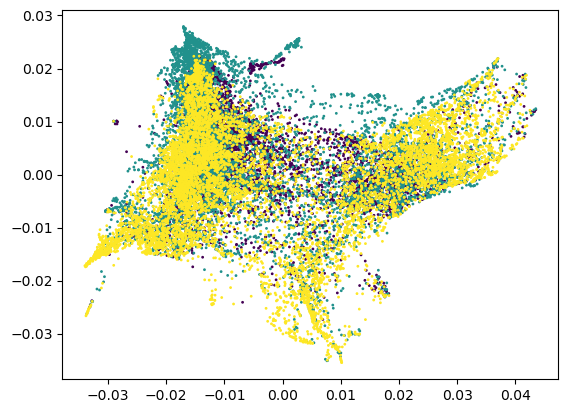

In [62]:
# phate on 50 pca components
phate_op = phate.PHATE(n_components=2)
df_train_donor_phate_50pca = phate_op.fit_transform(adata.obsm['X_pca'][:,:50])
df_train_donor_phate_50pca

plt.scatter(df_train_donor_phate_50pca[:,0], df_train_donor_phate_50pca[:,1], s=1, c=adata.obs['day_class'].tolist())

Calculating PHATE...
  Running PHATE on 22199 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 9.57 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 9.71 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.98 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.13 seconds.
  Calculated landmark operator in 4.55 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 2.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.55 seconds.
  Calculating metric MDS...


/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 12.02 seconds.
Calculated PHATE in 29.12 seconds.


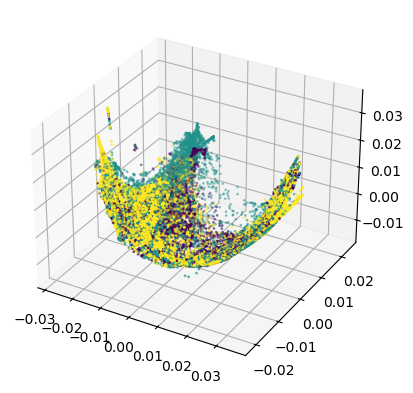

In [63]:
# phate on 50 pca
phate_op = phate.PHATE(n_components=3)
df_train_donor_phate_50pca_3d = phate_op.fit_transform(adata.obsm['X_pca'][:,:50])
df_train_donor_phate_50pca_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train_donor_phate_50pca_3d[:,0], df_train_donor_phate_50pca_3d[:,1], df_train_donor_phate_50pca_3d[:,2], s=1, c=adata.obs['day_class'].tolist())
plt.show()

In [66]:
df_train_donor_phate_50pca_3d

array([[-0.01208283,  0.0012407 , -0.00665182],
       [ 0.01888131,  0.00178948, -0.00473565],
       [-0.01698387,  0.00543864,  0.00081579],
       ...,
       [-0.00744836,  0.00550402, -0.00424436],
       [-0.01558391,  0.01265588,  0.00167762],
       [-0.01668356, -0.00709075,  0.00242827]])

In [65]:
# Plotly
import plotly.graph_objects as go

fig = go.Figure()
for i in range(adata.obs['day_class'].nunique()):
    fig.add_scatter3d(x=df_train_donor_phate_50pca_3d[adata.obs['day_class']==i,0], 
                      y=df_train_donor_phate_50pca_3d[adata.obs['day_class']==i,1], 
                      z=df_train_donor_phate_50pca_3d[adata.obs['day_class']==i,2], 
                      mode='markers', marker=dict(size=2, color=i))
fig.show()


Calculating PHATE...
  Running PHATE on 22199 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.98 seconds.
    Calculating KNN search...
    Calculated KNN search in 24.89 seconds.
    Calculating affinities...
    Calculated affinities in 6.84 seconds.
  Calculated graph and diffusion operator in 32.72 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.07 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.52 seconds.
  Calculated landmark operator in 3.02 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 2.45 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.50 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.83 seconds.
Calculated PHATE in 40.53 seconds.


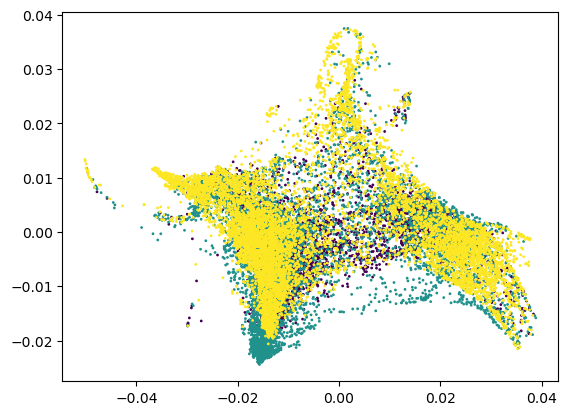

In [60]:
# phate on 1000 hvg
phate_op = phate.PHATE(n_components=2)
df_train_donor_phate_1000hvg = phate_op.fit_transform(adata.X[:,adata.var['highly_variable']])

plt.scatter(df_train_donor_phate_1000hvg[:,0], df_train_donor_phate_1000hvg[:,1], s=1, c=adata.obs['day_class'].tolist())
plt.show()


Calculating PHATE...
  Running PHATE on 22199 observations and 22050 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 19.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 30.76 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.80 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.89 seconds.
  Calculated landmark operator in 3.08 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 2.30 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.49 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.79 seconds.
Calculated PHATE in 38.42 seconds.


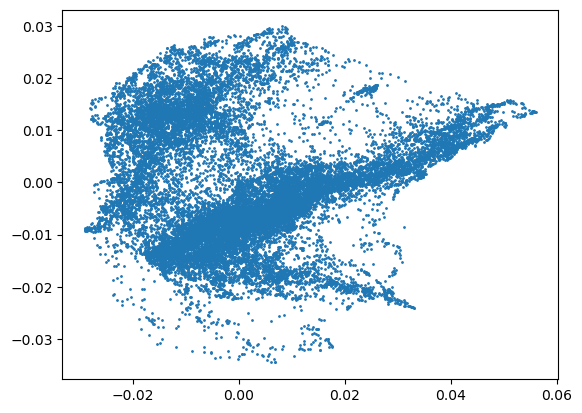

In [34]:
# Phate
phate_op = phate.PHATE(n_components=2)
df_train_donor_phate = phate_op.fit_transform(df_train_donor)
df_train_donor_phate


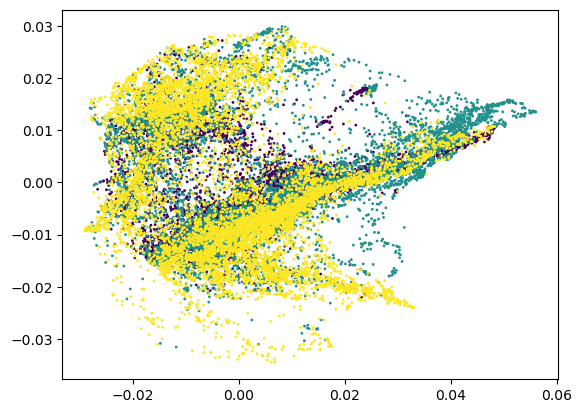

In [53]:
plt.scatter(df_train_donor_phate[:,0], df_train_donor_phate[:,1], s=1, c=adata.obs['day_class'].tolist())
plt.show()

Calculating PHATE...
  Running PHATE on 22199 observations and 22050 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 11.02 seconds.
    Calculating KNN search...
    Calculated KNN search in 21.88 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 33.96 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.82 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.99 seconds.
  Calculated landmark operator in 3.24 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 2.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.49 seconds.
  Calculating metric MDS...


/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 8.12 seconds.
Calculated PHATE in 48.11 seconds.


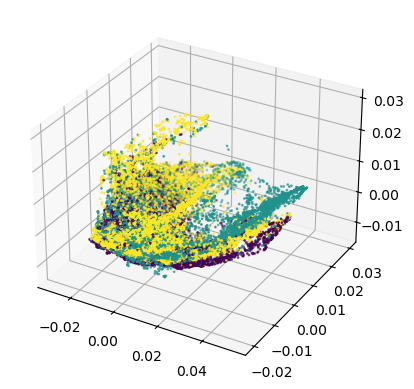

In [54]:
# phate 3d
phate_op = phate.PHATE(n_components=3)
df_train_donor_phate_3d = phate_op.fit_transform(df_train_donor)
df_train_donor_phate_3d

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


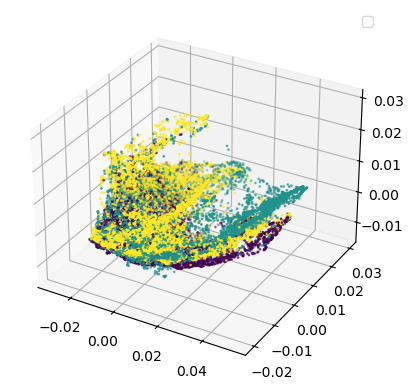

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train_donor_phate_3d[:,0], df_train_donor_phate_3d[:,1], df_train_donor_phate_3d[:,2], s=1, c=adata.obs['day_class'].tolist())
plt.show()